In [53]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# read the data
df = pd.read_csv('../data/all_movies_with_twitter_and_ratings.csv')

In [55]:
# Fix the entry for the movie "12 Strongs" -- the data collection script failed
# and we didn't want to re-run for one Movie. We just looked it up.
df.loc[df['movie_title']=='12 Strongs','critics_rating'] = 54
df.loc[df['movie_title']=='12 Strongs','audience_rating'] = 64


# a bit more data cleaninng -- throw out movies without rating
# or with -1 rating (there are only a few)
df = df[ df['critics_rating'] > -0.5 ]
df = df[ df['audience_rating'] > -0.5 ]

print(f"We've got {len(df)} good movie entries with ratings!")

We've got 283 good movie entries with ratings!


In [56]:
# More data prep, convert data types

# Make a float out of opening weekend box office
df.loc[:,['opening_weekend_count']] = \
     df['opening_weekend_count'].apply(lambda x: float( x.replace('$','').replace(',','') )\
                                       if type(x) is str else -1.0)
    
                                       
                                       
                                       #    if type(x) is not float else -1.0)
            

In [57]:
df.head(5)

,row,rank,movie_title,studio,total_gross,total_theater,opening_weekend_count,opening_theater_count,release_date,close_date,twitter1,twitter2,twitter3,twitter4,twitter5,RT_title,critics_rating,audience_rating
0,0,90,Eighth Grade,A24,"$1,648,837",158,263797.0,4,8/3/18,-,EighthGrade,NaN,NaN,NaN,NaN,Eighth_Grade,99.0,89.0
1,1,57,Mission: Impossible - Fallout,Par.,"$23,000,000","4,386",-1.0,"4,386",7/27/18,-,MissionImpossible,MissionImpossibleFallout,NaN,NaN,NaN,Mission_Impossible_Fallout,97.0,92.0
2,2,84,Teen Titans Go! To The Movies,WB,"$4,250,000","3,188",-1.0,"3,188",7/27/18,-,TeenTitansGOMovie,NaN,NaN,NaN,NaN,Teen_Titans_Go_To_The_Movies,90.0,72.0
4,4,22,Mamma Mia! Here We Go Again,Uni.,"$60,227,525","3,514",34952180.0,"3,317",7/20/18,-,MammaMia2,NaN,NaN,NaN,NaN,Mamma_Mia_Here_We_Go_Again,79.0,76.0
5,5,28,The Equalizer 2,Sony,"$54,241,345","3,388",36011640.0,"3,388",7/20/18,-,TheEqualizer2,NaN,NaN,NaN,NaN,The_Equalizer_2,50.0,74.0


/Users/cott/venvs/myvenvpy3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


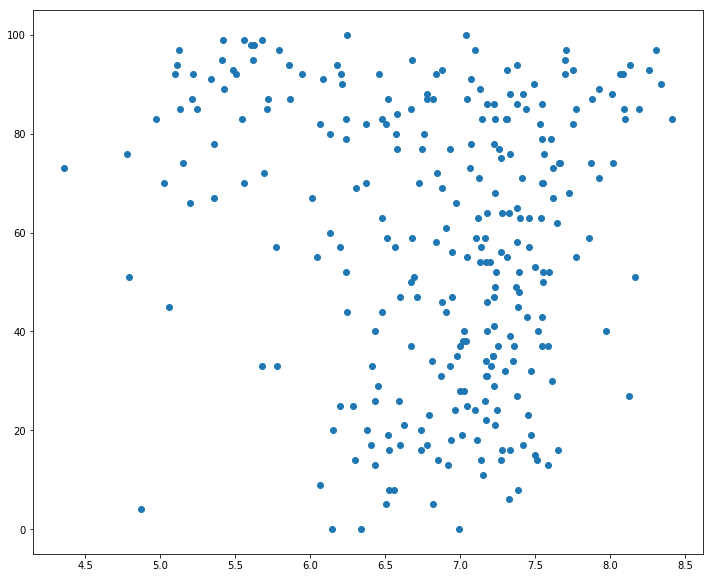

In [60]:
xfig = plt.figure(figsize=(12,10))
xx = df['opening_weekend_count']
yy = df['critics_rating']
plt.scatter(np.log10(xx),yy)

/Users/cott/venvs/myvenvpy3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


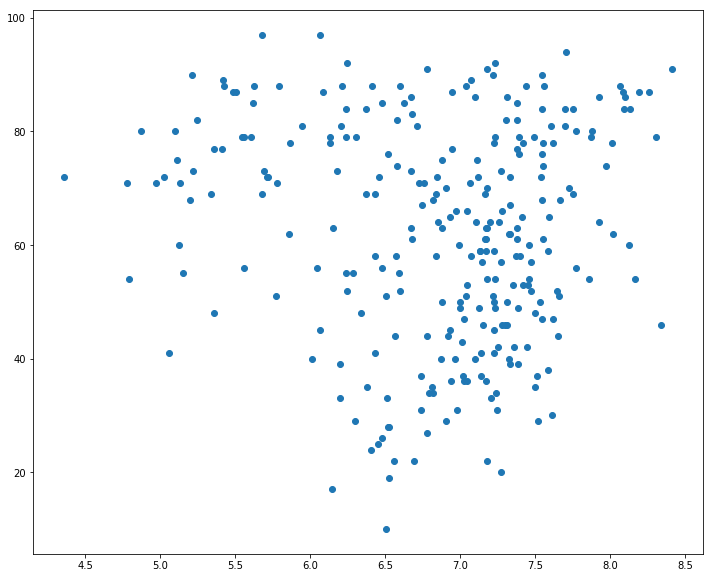

In [63]:
xfig = plt.figure(figsize=(12,10))
xx = df['opening_weekend_count']
yy = df['audience_rating']
plt.scatter(np.log10(xx),yy)